In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.plotting import output_file
from bs4 import BeautifulSoup
import requests
from io import StringIO

In [2]:
df = pd.read_csv('population_by_country_2020.csv')
df

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [3]:
df = df.drop('Yearly Change', 1)
df = df.drop('Net Change', 1)
df

C:\Users\erlen\AppData\Local\Temp/ipykernel_19804/485692922.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Yearly Change', 1)
C:\Users\erlen\AppData\Local\Temp/ipykernel_19804/485692922.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Net Change', 1)


,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [4]:
df = df[0:10]
df

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,287,770880,-233379.0,3.6,23,35 %,2.83 %
5,Brazil,212821986,25,8358140,21200.0,1.7,33,88 %,2.73 %
6,Nigeria,206984347,226,910770,-60000.0,5.4,18,52 %,2.64 %
7,Bangladesh,164972348,1265,130170,-369501.0,2.1,28,39 %,2.11 %
8,Russia,145945524,9,16376870,182456.0,1.8,40,74 %,1.87 %
9,Mexico,129166028,66,1943950,-60000.0,2.1,29,84 %,1.65 %


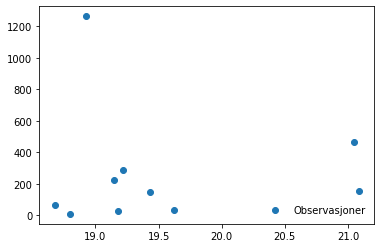

In [5]:
fig,ax=plt.subplots()



#plotting the function:
ax.scatter(np.log(df['Population (2020)']), df['Density (P/Km²)'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

In [6]:
df.rename(columns = {'Country (or dependency)':'country', 'Population (2020)':'Population'}, inplace = True)
df

C:\Users\erlen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,country,Population,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,287,770880,-233379.0,3.6,23,35 %,2.83 %
5,Brazil,212821986,25,8358140,21200.0,1.7,33,88 %,2.73 %
6,Nigeria,206984347,226,910770,-60000.0,5.4,18,52 %,2.64 %
7,Bangladesh,164972348,1265,130170,-369501.0,2.1,28,39 %,2.11 %
8,Russia,145945524,9,16376870,182456.0,1.8,40,74 %,1.87 %
9,Mexico,129166028,66,1943950,-60000.0,2.1,29,84 %,1.65 %


In [7]:
country={'China': 'Kina', 'India': 'India', 'United States': 'USA', 'Indonesia': 'Indonesia', 'Pakistan': 'Pakistan', 'Brazil': 'Brasil', 'Nigeria':'Nigeria','Bangladesh':'Bangladesh',
'Russia':'Russland', 'Mexico':'Mexico'}
colors={'China': '#E14827', 'India': '#FAEBD7', 'United States': '#CD3333', 'Indonesia': '#CDAA7D', 'Pakistan': '#8A3324', 'Brazil': '#FFC125', 'Nigeria':'#00C957','Bangladesh':'#8B5742',
'Russia':'#FFFAFA', 'Mexico':'#D02090'}


df['country_no']=df['country'].apply(lambda cont:  country[cont])
df['colors']=df['country'].apply(lambda cont: colors[cont])
df

C:\Users\erlen\AppData\Local\Temp/ipykernel_19804/1510005384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_no']=df['country'].apply(lambda cont:  country[cont])
C:\Users\erlen\AppData\Local\Temp/ipykernel_19804/1510005384.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors']=df['country'].apply(lambda cont: colors[cont])


,country,Population,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,country_no,colors
0,China,1440297825,153,9388211,-348399.0,1.7,38,61 %,18.47 %,Kina,#E14827
1,India,1382345085,464,2973190,-532687.0,2.2,28,35 %,17.70 %,India,#FAEBD7
2,United States,331341050,36,9147420,954806.0,1.8,38,83 %,4.25 %,USA,#CD3333
3,Indonesia,274021604,151,1811570,-98955.0,2.3,30,56 %,3.51 %,Indonesia,#CDAA7D
4,Pakistan,221612785,287,770880,-233379.0,3.6,23,35 %,2.83 %,Pakistan,#8A3324
5,Brazil,212821986,25,8358140,21200.0,1.7,33,88 %,2.73 %,Brasil,#FFC125
6,Nigeria,206984347,226,910770,-60000.0,5.4,18,52 %,2.64 %,Nigeria,#00C957
7,Bangladesh,164972348,1265,130170,-369501.0,2.1,28,39 %,2.11 %,Bangladesh,#8B5742
8,Russia,145945524,9,16376870,182456.0,1.8,40,74 %,1.87 %,Russland,#FFFAFA
9,Mexico,129166028,66,1943950,-60000.0,2.1,29,84 %,1.65 %,Mexico,#D02090


In [8]:
df['size']=df['Population'].apply(lambda pop: pop**0.5/300)
display(df[df['country']=='India'])
df

C:\Users\erlen\AppData\Local\Temp/ipykernel_19804/3028429473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size']=df['Population'].apply(lambda pop: pop**0.5/300)


,country,Population,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,country_no,colors,size
1,India,1382345085,464,2973190,-532687.0,2.2,28,35 %,17.70 %,India,#FAEBD7,123.933005


,country,Population,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,country_no,colors,size
0,China,1440297825,153,9388211,-348399.0,1.7,38,61 %,18.47 %,Kina,#E14827,126.504186
1,India,1382345085,464,2973190,-532687.0,2.2,28,35 %,17.70 %,India,#FAEBD7,123.933005
2,United States,331341050,36,9147420,954806.0,1.8,38,83 %,4.25 %,USA,#CD3333,60.675920
3,Indonesia,274021604,151,1811570,-98955.0,2.3,30,56 %,3.51 %,Indonesia,#CDAA7D,55.178660
4,Pakistan,221612785,287,770880,-233379.0,3.6,23,35 %,2.83 %,Pakistan,#8A3324,49.622216
5,Brazil,212821986,25,8358140,21200.0,1.7,33,88 %,2.73 %,Brasil,#FFC125,48.628065
6,Nigeria,206984347,226,910770,-60000.0,5.4,18,52 %,2.64 %,Nigeria,#00C957,47.956502
7,Bangladesh,164972348,1265,130170,-369501.0,2.1,28,39 %,2.11 %,Bangladesh,#8B5742,42.813854
8,Russia,145945524,9,16376870,182456.0,1.8,40,74 %,1.87 %,Russland,#FFFAFA,40.269305
9,Mexico,129166028,66,1943950,-60000.0,2.1,29,84 %,1.65 %,Mexico,#D02090,37.883744


In [9]:
df['pop_mill_str']=df['Population'].apply(lambda pop:  '{:,}'.format(int(pop/1000000)))
df

C:\Users\erlen\AppData\Local\Temp/ipykernel_19804/253107367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pop_mill_str']=df['Population'].apply(lambda pop:  '{:,}'.format(int(pop/1000000)))


,country,Population,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,country_no,colors,size,pop_mill_str
0,China,1440297825,153,9388211,-348399.0,1.7,38,61 %,18.47 %,Kina,#E14827,126.504186,"1,440"
1,India,1382345085,464,2973190,-532687.0,2.2,28,35 %,17.70 %,India,#FAEBD7,123.933005,"1,382"
2,United States,331341050,36,9147420,954806.0,1.8,38,83 %,4.25 %,USA,#CD3333,60.675920,331
3,Indonesia,274021604,151,1811570,-98955.0,2.3,30,56 %,3.51 %,Indonesia,#CDAA7D,55.178660,274
4,Pakistan,221612785,287,770880,-233379.0,3.6,23,35 %,2.83 %,Pakistan,#8A3324,49.622216,221
5,Brazil,212821986,25,8358140,21200.0,1.7,33,88 %,2.73 %,Brasil,#FFC125,48.628065,212
6,Nigeria,206984347,226,910770,-60000.0,5.4,18,52 %,2.64 %,Nigeria,#00C957,47.956502,206
7,Bangladesh,164972348,1265,130170,-369501.0,2.1,28,39 %,2.11 %,Bangladesh,#8B5742,42.813854,164
8,Russia,145945524,9,16376870,182456.0,1.8,40,74 %,1.87 %,Russland,#FFFAFA,40.269305,145
9,Mexico,129166028,66,1943950,-60000.0,2.1,29,84 %,1.65 %,Mexico,#D02090,37.883744,129


In [10]:
df['Urban Pop %'] = df['Urban Pop %'].str.replace('%', '')
df['World Share'] = df['World Share'].str.replace('%', '')
df.head()


C:\Users\erlen\AppData\Local\Temp/ipykernel_19804/624296014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Urban Pop %'] = df['Urban Pop %'].str.replace('%', '')
C:\Users\erlen\AppData\Local\Temp/ipykernel_19804/624296014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['World Share'] = df['World Share'].str.replace('%', '')


,country,Population,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,country_no,colors,size,pop_mill_str
0,China,1440297825,153,9388211,-348399.0,1.7,38,61,18.47,Kina,#E14827,126.504186,"1,440"
1,India,1382345085,464,2973190,-532687.0,2.2,28,35,17.70,India,#FAEBD7,123.933005,"1,382"
2,United States,331341050,36,9147420,954806.0,1.8,38,83,4.25,USA,#CD3333,60.675920,331
3,Indonesia,274021604,151,1811570,-98955.0,2.3,30,56,3.51,Indonesia,#CDAA7D,55.178660,274
4,Pakistan,221612785,287,770880,-233379.0,3.6,23,35,2.83,Pakistan,#8A3324,49.622216,221


In [11]:
df['Andel_befolkning']=df['World Share'].apply(lambda l: float(l))
df.head()

C:\Users\erlen\AppData\Local\Temp/ipykernel_19804/3044872248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Andel_befolkning']=df['World Share'].apply(lambda l: float(l))


,country,Population,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,country_no,colors,size,pop_mill_str,Andel_befolkning
0,China,1440297825,153,9388211,-348399.0,1.7,38,61,18.47,Kina,#E14827,126.504186,"1,440",18.47
1,India,1382345085,464,2973190,-532687.0,2.2,28,35,17.70,India,#FAEBD7,123.933005,"1,382",17.70
2,United States,331341050,36,9147420,954806.0,1.8,38,83,4.25,USA,#CD3333,60.675920,331,4.25
3,Indonesia,274021604,151,1811570,-98955.0,2.3,30,56,3.51,Indonesia,#CDAA7D,55.178660,274,3.51
4,Pakistan,221612785,287,770880,-233379.0,3.6,23,35,2.83,Pakistan,#8A3324,49.622216,221,2.83


In [12]:
from bokeh.plotting import figure

#creating figure:
p = figure(
        title = "Populasjon og areal 10 største landene", 
        x_axis_label = 'Fertilsrate',
        y_axis_label = 'Median alder',
    
        x_axis_type = "log",
    
        tools="hover", 
        tooltips = [
            ("Land","@country_no"),
            ("Andel av jordas befolkning i prosent", "@Andel_befolkning"),
            ("Befolkning","@pop_mill_str")
            ],
    
        plot_height = 580,
        plot_width = 980)

In [13]:
from bokeh.io import show, output_notebook
from bokeh.plotting import output_file

p.scatter(
    source=df,
    x= 'Fert. Rate', 
    y= 'Med. Age',
    
    size='size', 
    color= 'colors',
    legend_field='country_no',
    alpha= 0.8
    )

#Creating the graph and saving as html
output_notebook()
output_file("populasjoon.html")
show(p)

Loading BokehJS ...

In [14]:
("Fert. Rate","@Fert. Rate"),
            ("Med. Age","@Med. Age"),

IndentationError: unexpected indent (Temp/ipykernel_19804/2347947639.py, line 2)